## Explore modeling with the **raw data**, **standardized data**, and **normalized data** and see if there is a b**eneficial difference** in the performance of the **resulting model**.

# 1. model with the **raw data**

In [2]:
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler

In [35]:
# load sonar data
sonar_data = pd.read_csv('sonar.csv',header=None)
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [71]:
# separate into input(predictors) and output(response) columns 
X , y = sonar_data.iloc[:,0:-1],sonar_data.iloc[:,-1]


In [38]:
# check the 'min' and 'max' values
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


### histograms of the variables

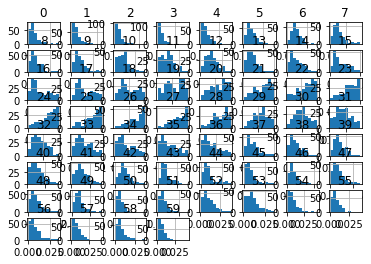

In [40]:
# check for ranges before scaling
X.hist(bins=10)
pyplot.show()

#### create heatmap

<AxesSubplot:>

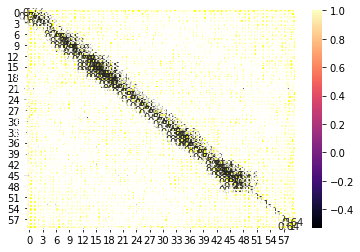

In [82]:
import seaborn as sns

# load dataset
sonar_data = pd.read_csv('sonar.csv',header=None)
# sonar_data.corr()
sns.heatmap(sonar_data.corr(),cmap='magma',annot=True,linecolor='yellow',linewidths=2)

## **kNN algorithm** WITHOUT **MinMaxScaler** and evaluate it using repeated stratified k-fold cross-validation.

In [65]:
# MODEL USING KNN WITHOUT TRANSFORMING SCALES with MinMaxScale
import pandas as pd
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# load dataset
sonar_data = pd.read_csv('sonar.csv',header=None)
sonar_data.head()

# separate into input and output columns
X , y = sonar_data.iloc[:,0:-1],sonar_data.iloc[:,-1]

# ensure inputs are floats and output is an integer label
X # already in 'float'
y = LabelEncoder().fit_transform(y.astype('str')) #transform non-numerical labels to numerical labels.

# define and configure the model
model = KNeighborsClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report model performance
print('Accuracy: mean->%.3f std->(%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: mean->0.797 std->(0.073)


#### We can see that the model achieved a mean classification accuracy of about 79.7 percent, showing that it has skill (better than 53.4 percent) and is in the ball-park of good performance (88 percent).

## datatset tranformation through **MinMaxScaler** Transform


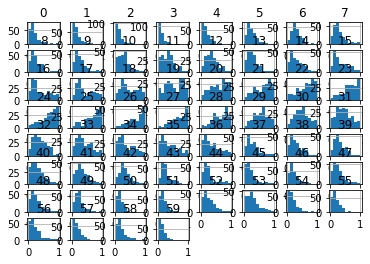

In [62]:
#  Normalize sonar data into 0 and 1 using 'MinMaxScaler' its default range.
scaler = MinMaxScaler()  # default configuration -- > 0 and 1
sonar_data_scaled = scaler.fit_transform(X) # fit it on our dataset i.e. sonar dataset

# convert array to dataframe
sonar_data_scaled = pd.DataFrame(sonar_data_scaled)
# print(sonar_data_scaled)

# plot the histogram for each column
sonar_data_scaled.hist(bins=10)
pyplot.show()

#### This confirms the 60 input variables, one output variable, and 208 rows of data.

##  summary of sonar dataset after using MinMaxScale

In [30]:
# summary of sonar dataset after transforming with MinMaxScale
sonar_data_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.204011,0.162180,0.139068,0.114342,0.173732,0.253615,0.320472,0.285114,0.252485,0.281652,...,0.160047,0.180031,0.265172,0.290669,0.197061,0.200555,0.213642,0.175035,0.216015,0.136425
std,0.169550,0.141277,0.126242,0.110623,0.140888,0.158843,0.167175,0.187767,0.175311,0.192215,...,0.119607,0.137432,0.183385,0.213474,0.160717,0.147080,0.164361,0.148051,0.170286,0.116190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.087389,0.067938,0.057326,0.044163,0.079508,0.152714,0.209957,0.165215,0.132571,0.142964,...,0.083914,0.092368,0.118831,0.127924,0.080499,0.102564,0.096591,0.075515,0.098485,0.057737
50%,0.157080,0.129447,0.107753,0.090942,0.141517,0.220236,0.280438,0.235061,0.214349,0.244673,...,0.138446,0.151213,0.235065,0.242690,0.156463,0.165385,0.160511,0.125858,0.173554,0.108545
75%,0.251106,0.202958,0.185447,0.139563,0.237319,0.333042,0.407738,0.361852,0.334555,0.368082,...,0.207420,0.227175,0.374026,0.394737,0.260771,0.260897,0.287642,0.229977,0.281680,0.183025
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see **above** that the distributions have been adjusted and that the **minimum** and **maximum** values for each variable are now a crisp 0.0 and 1.0 respectively.

# 2. model with the **normalized data**

## **kNN algorithm** after being transformed WITH **MinMaxScaler**

In [67]:
# MODEL USING KNN WITH TRANSFORMING SCALES with MinMaxScale
# evaluate kNN on the sonar dataset with minmax scaler transform
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# load dataset
sonar_data = pd.read_csv('sonar.csv',header=None)
sonar_data.head()

# separate into input and output columns
X , y = sonar_data.iloc[:,0:-1],sonar_data.iloc[:,-1]

# ensure inputs are floats and output is an integer label
X # already in 'float'
y = LabelEncoder().fit_transform(y.astype('str')) #transform non-numerical labels to numerical labels.

# define the pipeline
trans = MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: mean->% .3f std->(%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: mean-> 0.813 std->(0.085)


Running the above codes, we can see that the **MinMaxScaler transform** results in a **lift** in performance **from** 79.7 percent accuracy without the transform **to** about 81.3 percent with the transform.

## datatset tranformation through **StandardScaler** Transform

##### We can apply the StandardScaler to the Sonar dataset directly to standardize the input variables.

#### Creating a **StandardScaler** transform of the sonar dataset and plotting histograms of the results 

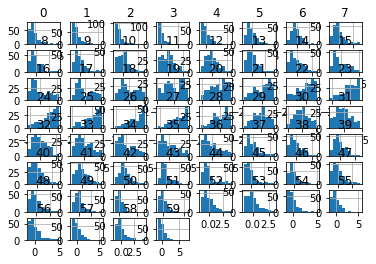

In [68]:
# visualize a standard scaler transform of the sonar dataset
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

# load dataset
sonar_data = pd.read_csv('sonar.csv',header=None)
sonar_data.head()

# retrieve just the numeric input values
X = sonar_data.iloc[:, 0:-1]

# perform a robust scaler transform of the dataset(Standardize sonar data using 'StandardScaler' default parameters)
#  Standardize sonar data into 0 and 1 using 'StandardScaler' its default range.
scaler = StandardScaler() 
sonar_data_scaled = scaler.fit_transform(X) # fit it on our dataset i.e. sonar dataset

# convert array to dataframe
sonar_data_scaled = pd.DataFrame(sonar_data_scaled)
# print(sonar_data_scaled)

# plot the histogram for each column
sonar_data_scaled.hist(bins=10)
pyplot.show()

In [70]:
sonar_data_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,...,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02
mean,-4.190024e-17,1.663333e-16,-9.661075e-17,1.627971e-16,-1.297039e-16,2.017617e-16,9.607699e-17,1.271019e-17,-3.339343e-16,2.268485e-17,...,3.736327e-18,1.316388e-16,-1.387779e-17,-1.793437e-16,8.433425e-17,-2.199096e-16,4.590345e-17,-7.686159e-17,1.283695e-16,3.149190e-17
std,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,...,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00
min,-1.206158e+00,-1.150725e+00,-1.104253e+00,-1.036115e+00,-1.236093e+00,-1.600493e+00,-1.921613e+00,-1.522110e+00,-1.443689e+00,-1.468833e+00,...,-1.341343e+00,-1.313126e+00,-1.449472e+00,-1.364897e+00,-1.229092e+00,-1.366868e+00,-1.302971e+00,-1.185113e+00,-1.271603e+00,-1.176985e+00
25%,-6.894939e-01,-6.686781e-01,-6.490624e-01,-6.359298e-01,-6.703975e-01,-6.367565e-01,-6.626732e-01,-6.400918e-01,-6.856590e-01,-7.232644e-01,...,-6.380641e-01,-6.394049e-01,-7.999231e-01,-7.642025e-01,-7.270112e-01,-6.678488e-01,-7.138771e-01,-6.738235e-01,-6.918580e-01,-6.788714e-01
50%,-2.774703e-01,-2.322506e-01,-2.486515e-01,-2.120457e-01,-2.292089e-01,-2.106432e-01,-2.400524e-01,-2.672134e-01,-2.180558e-01,-1.928459e-01,...,-1.810370e-01,-2.102002e-01,-1.645716e-01,-2.252935e-01,-2.532164e-01,-2.396997e-01,-3.240352e-01,-3.329639e-01,-2.499546e-01,-2.405314e-01
75%,2.784345e-01,2.893335e-01,3.682681e-01,2.285353e-01,4.524231e-01,5.012417e-01,5.232608e-01,4.096773e-01,4.692723e-01,4.507410e-01,...,3.970293e-01,3.438640e-01,5.950106e-01,4.886751e-01,3.973675e-01,4.112618e-01,4.513169e-01,3.719959e-01,3.865486e-01,4.020352e-01
max,4.706053e+00,5.944643e+00,6.836142e+00,8.025419e+00,5.878863e+00,4.710224e+00,4.074573e+00,3.816498e+00,4.274237e+00,3.746234e+00,...,7.039574e+00,5.980752e+00,4.016680e+00,3.330819e+00,5.008027e+00,5.448568e+00,4.795888e+00,5.585599e+00,4.615037e+00,7.450343e+00


We can see that the distributions have been adjusted and that the mean is a very small number close to zero and the standard deviation is very close to 1.0 for each variable.

# 3. model with the **standardized data**

## **kNN algorithm** after being transformed WITH **StandardScaler**

In [69]:
# evaluate knn on the sonar dataset with standard scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load dataset
sonar_data = pd.read_csv('sonar.csv',header=None)
sonar_data.head()

# separate into input and output columns
X, y = sonar_data.iloc[:, :-1], sonar_data.iloc[:, -1]

# ensure inputs are floats and output is an integer label
X # already in 'float'
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report pipeline performance
print('Accuracy: mean->%.3f std->(%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: mean->0.810 std->(0.080)
